# EDA

##### 20_명세서일반내역, 40_상병 데이터셋 탐색적분석 결과
##### 연령대별 많이 진료하는 진료과목코드에 대한 분석 필요성 발생
##### x = 연령구간, y = 진료과목으로 설정
##### x <- 수진자연령을 구간별로 조건을 달리해 컬럼 생성
##### y <- 진료과목별 수진자연령 수 count

# 데이터 정제

### 데이터 불러오기

In [3]:
import pandas as pd

In [4]:
sheet_list = ["20table_명세서일반내역",
                  "30table_진료내역",
                  "40table_상병",
                  "53table_처방전상세내역"]

for i in range (len(sheet_list)):
    file_path = './files_new2/df_kor_{}.xlsx'.format(sheet_list[i])
    globals()['df{}'.format(i)] = pd.read_excel(file_path, index_col=0)

In [5]:
df2
df4 = df2[df2['상병일련번호']==1].reset_index()
df4
#df4

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
0,1,1,01,A090,1
1,2,1,01,I109,1
2,3,1,03,F849,3
3,4,1,54,K0538,54
4,5,1,01,J00,1
...,...,...,...,...,...
5622,5627,1,56,K121,56
5623,5628,1,01,C921,1
5624,5629,1,11,J320,11
5625,5630,1,05,M7954,5


In [6]:
df_24 = pd.merge(df0,df4, how='outer', on='명세서 연결코드')
df_24

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,0,$,$,$,$,30796,1.0,01,A090,1.0
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,0,$,$,$,$,9795,1.0,01,I109,1.0
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,0,$,$,$,$,34835,1.0,03,F849,3.0
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,0,$,$,$,$,35538,1.0,54,K0538,54.0
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,0,$,$,$,$,4665,1.0,01,J00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,0,$,$,$,$,21762,1.0,56,K121,56.0
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,0,V193,$,$,$,45362,1.0,01,C921,1.0
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,0,$,$,$,$,12083,1.0,11,J320,11.0
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,0,$,$,$,$,21067,1.0,05,M7954,5.0


In [7]:
df_24_age = df_24[['요양개시일자','수진자연령','상병진료과목코드']]
df_24_age

,요양개시일자,수진자연령,상병진료과목코드
0,20130108,62,01
1,20130212,74,01
2,20130222,14,03
3,20130608,68,54
4,20131128,19,01
...,...,...,...
5626,20131001,9,56
5627,20130423,20,01
5628,20130112,4,11
5629,20130401,47,05


### X : 연령별 구간분류

In [8]:
df_9under = df_24_age[df_24_age['수진자연령'] <= 9]
df_9under.reset_index(drop=True)
df_9under['연령대'] = '9세이하'
df_10 = df_24_age[(df_24_age['수진자연령'] > 9) & (df_24_age['수진자연령'] <= 19)]
df_10.reset_index(drop=True)
df_10['연령대'] = '10대'
df_20 = df_24_age[(df_24_age['수진자연령'] >= 20) & (df_24_age['수진자연령'] < 30)]
df_20.reset_index(drop=True)
df_20['연령대'] = '20대'
df_30 = df_24_age[(df_24_age['수진자연령'] >= 30) & (df_24_age['수진자연령'] < 40)]
df_30.reset_index(drop=True)
df_30['연령대'] = '30대'
df_40 = df_24_age[(df_24_age['수진자연령'] >= 40) & (df_24_age['수진자연령'] < 50)]
df_40.reset_index(drop=True)
df_40['연령대'] = '40대'
df_50 = df_24_age[(df_24_age['수진자연령'] >= 50) & (df_24_age['수진자연령'] < 60)]
df_50.reset_index(drop=True)
df_50['연령대'] = '50대'
df_60 = df_24_age[(df_24_age['수진자연령'] >= 60) & (df_24_age['수진자연령'] < 70)]
df_60.reset_index(drop=True)
df_60['연령대'] = '60대'
df_70 = df_24_age[(df_24_age['수진자연령'] >= 70) & (df_24_age['수진자연령'] < 80)]
df_70.reset_index(drop=True)
df_70['연령대'] = '70대'
df_80 = df_24_age[(df_24_age['수진자연령'] >= 80) & (df_24_age['수진자연령'] < 90)]
df_80.reset_index(drop=True)
df_80['연령대'] = '80대'
df_90 = df_24_age[(df_24_age['수진자연령'] >= 90) & (df_24_age['수진자연령'] < 100)]
df_90.reset_index(drop=True)
df_90['연령대'] = '90대'
df_90

C:\Users\admin\AppData\Local\Temp\ipykernel_10208\90280112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9under['연령대'] = '9세이하'
C:\Users\admin\AppData\Local\Temp\ipykernel_10208\90280112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['연령대'] = '10대'
C:\Users\admin\AppData\Local\Temp\ipykernel_10208\90280112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,요양개시일자,수진자연령,상병진료과목코드,연령대
473,20130827,94,15,90대
1167,20130916,94,01,90대
2276,20130105,93,01,90대
2445,20130117,93,06,90대
2665,20130624,94,01,90대
2765,20130423,94,01,90대
3302,20130709,94,14,90대
4060,20131208,94,01,90대
4599,20130401,94,01,90대
4988,20130416,94,01,90대


In [9]:
df_24_age = pd.concat([df_9under,df_10,df_20,df_30,df_40,df_50,df_60,df_70,df_80,df_90], axis=0, sort=True)
df_24_age

,상병진료과목코드,수진자연령,연령대,요양개시일자
6,23,3,9세이하,20131211
11,01,6,9세이하,20130129
20,55,3,9세이하,20130130
48,01,6,9세이하,20130130
54,11,6,9세이하,20130502
...,...,...,...,...
2765,01,94,90대,20130423
3302,14,94,90대,20130709
4060,01,94,90대,20131208
4599,01,94,90대,20130401


In [10]:
df_24_age['요양개시일자'] = df_24_age['요양개시일자'].astype(str)
df_24_age['요양개시월'] = df_24_age['요양개시일자'].str[4:6]
df_24_age

,상병진료과목코드,수진자연령,연령대,요양개시일자,요양개시월
6,23,3,9세이하,20131211,12
11,01,6,9세이하,20130129,01
20,55,3,9세이하,20130130,01
48,01,6,9세이하,20130130,01
54,11,6,9세이하,20130502,05
...,...,...,...,...,...
2765,01,94,90대,20130423,04
3302,14,94,90대,20130709,07
4060,01,94,90대,20131208,12
4599,01,94,90대,20130401,04


In [11]:
#df_24_age.to_excel('./files_new/df_2040_age.xlsx', index=False)

In [12]:
df_24_age = pd.DataFrame()

df_24_age = pd.concat([df_24_age, df_9under, df_10, df_20, df_30, df_40, df_50, df_60, df_70, df_80, df_90], ignore_index=True)

df_24_age = df_24_age.reset_index(drop=True)
print(len(df_24_age))
df_24_age

5631


,요양개시일자,수진자연령,상병진료과목코드,연령대
0,20131211,3,23,9세이하
1,20130129,6,01,9세이하
2,20130130,3,55,9세이하
3,20130130,6,01,9세이하
4,20130502,6,11,9세이하
...,...,...,...,...
5626,20130423,94,01,90대
5627,20130709,94,14,90대
5628,20131208,94,01,90대
5629,20130401,94,01,90대


In [13]:
df_24_age = df_24_age[df_24_age['상병진료과목코드']!='$']
df_24_age[df_24_age['상병진료과목코드']=='$']
df_24_age

,요양개시일자,수진자연령,상병진료과목코드,연령대
0,20131211,3,23,9세이하
1,20130129,6,01,9세이하
2,20130130,3,55,9세이하
3,20130130,6,01,9세이하
4,20130502,6,11,9세이하
...,...,...,...,...
5626,20130423,94,01,90대
5627,20130709,94,14,90대
5628,20131208,94,01,90대
5629,20130401,94,01,90대


### Y : 진료과목별 수진자수

In [14]:
DGSBJT_CD = pd.read_csv('./files_new2/DGSBJT_CD.csv', sep = ",")

In [15]:
DGSBJT_CD = DGSBJT_CD.astype('str')
DGSBJT_CD.info()
DGSBJT_CD['상병진료과목코드'] = DGSBJT_CD['상병진료과목코드'].str.zfill(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상병진료과목코드  48 non-null     object
 1   진료과목      48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [16]:
df_24 = pd.merge(df_24_age, DGSBJT_CD, how='left', on='상병진료과목코드')
#df_2040_age = pd.concat([df_2040_age, DGSBJT_CD])
df_24

,요양개시일자,수진자연령,상병진료과목코드,연령대,진료과목
0,20131211,3,23,9세이하,가정의학과
1,20130129,6,01,9세이하,내과
2,20130130,3,55,9세이하,치과보존과
3,20130130,6,01,9세이하,내과
4,20130502,6,11,9세이하,소아청소년과
...,...,...,...,...,...
5623,20130423,94,01,90대,내과
5624,20130709,94,14,90대,피부과
5625,20131208,94,01,90대,내과
5626,20130401,94,01,90대,내과


### 진료과목당 연령대별 수진자수 집계

In [17]:
# 연령대별 수진자연령 집계하기
df_24_pivot = df_24.pivot_table(values='수진자연령',
                            index='진료과목',
                            columns='연령대',
                            aggfunc='count')
df_24_pivot = df_24_pivot.fillna(0)
df_24_pivot.drop(axis=0)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [18]:
df_24_pivot

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
진료과목,,,,,,,,,,
가정의학과,20.0,5.0,11.0,46.0,19.0,40.0,44.0,39.0,0.0,17.0
구강내과,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
구강악안면외과,4.0,14.0,3.0,15.0,4.0,9.0,12.0,3.0,0.0,0.0
내과,73.0,66.0,140.0,192.0,364.0,455.0,493.0,62.0,7.0,32.0
마취통증의학과,0.0,0.0,0.0,0.0,49.0,97.0,8.0,0.0,0.0,0.0
비뇨기과,1.0,3.0,0.0,3.0,39.0,12.0,27.0,6.0,1.0,3.0
산부인과,1.0,26.0,42.0,19.0,8.0,9.0,1.0,0.0,0.0,2.0
성형외과,5.0,1.0,3.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
소아청소년과,45.0,5.0,1.0,2.0,0.0,9.0,8.0,0.0,0.0,398.0


### 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_24_group =df_24.groupby(df_24['진료과목']).head(1).reset_index(drop=True)
df_24_group
#df_24_subject[df_24_subject.duplicated(keep='first')]

,요양개시일자,수진자연령,상병진료과목코드,연령대,진료과목
0,20131211,3,23,9세이하,가정의학과
1,20130129,6,01,9세이하,내과
2,20130130,3,55,9세이하,치과보존과
3,20130502,6,11,9세이하,소아청소년과
4,20130912,3,12,9세이하,안과
5,20130819,4,06,9세이하,신경외과
6,20130701,3,13,9세이하,이비인후과
7,20130710,4,05,9세이하,정형외과
8,20130916,9,02,9세이하,신경과
9,20130626,7,53,9세이하,소아치과


In [21]:
k=[]
for i in range(len(df_24_group)):
    k.append(df_24_group['진료과목'][i])
k

['가정의학과',
 '내과',
 '치과보존과',
 '소아청소년과',
 '안과',
 '신경외과',
 '이비인후과',
 '정형외과',
 '신경과',
 '소아치과',
 '비뇨기과',
 '외과',
 '피부과',
 '예방의학과',
 '응급의학과',
 '산부인과',
 '흉부외과',
 '구강내과',
 '정신과',
 '치과',
 '구강악안면외과',
 '성형외과',
 '치주과',
 '재활의학과',
 '치과보철과',
 '영상의학과',
 '마취통증의학과']

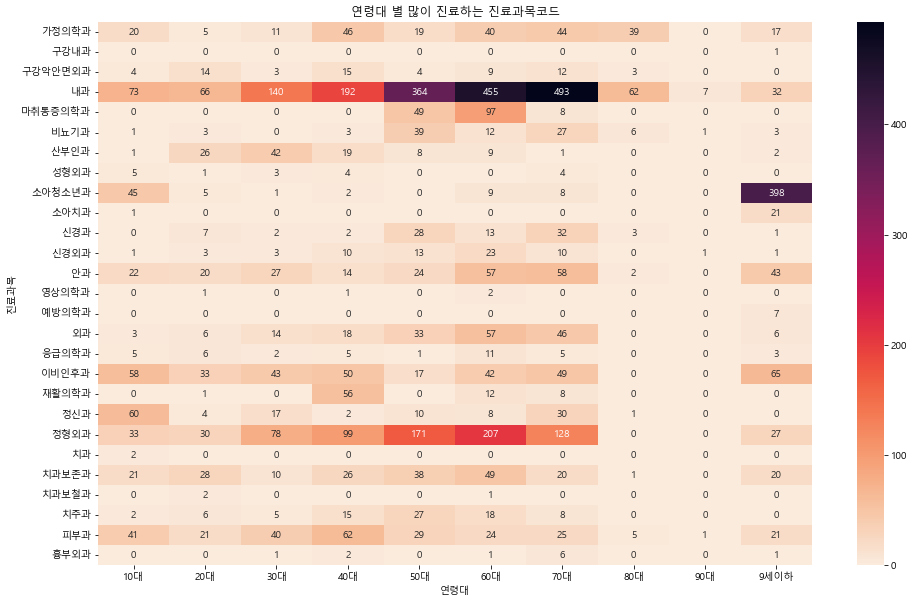

In [24]:
plt.figure(figsize=(16,10))
plt.rc("font", family = "Malgun Gothic", size=10)
sns.heatmap(df_24_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("연령대 별 많이 진료하는 진료과목코드")
plt.show()

# 결론

##### 9세 이하가 가장 많이 진료받는 진료과목은 '소아청소년과'로 기록 
##### 10대가 가장 많이 진료받는 진료과목은 '내과'로 기록
##### 20대, 30대, 40대, 50대, 60대,70대, 80대, 90대가 가장 많이 진료받는 진료과목은 '내과'로 기록